In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingTokyo.csv")
Pre_data

,Unnamed: 0,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
0,0,2.0,0.0,0.0,4.0,35.670170,139.741313,1.0,0.0,0.0,95
1,1,1.0,1.0,1.0,5.0,35.644269,139.693466,0.0,1.0,0.0,34
2,2,2.0,1.0,0.0,1.0,35.730653,139.689986,0.0,1.0,0.0,50
3,5,5.0,2.0,1.0,5.0,35.658389,139.774400,1.0,0.0,0.0,302
4,7,4.0,1.0,1.0,2.0,35.731696,139.762696,1.0,0.0,0.0,95
...,...,...,...,...,...,...,...,...,...,...,...
3454,5979,5.0,2.0,1.0,1.0,35.712326,139.785087,1.0,0.0,0.0,52
3455,5991,3.0,1.0,1.0,0.0,35.697329,139.694713,1.0,0.0,0.0,95
3456,6004,2.0,1.0,1.0,1.0,35.706011,139.782799,1.0,0.0,0.0,59
3457,6029,4.0,1.0,1.0,1.0,35.683989,139.741884,1.0,0.0,0.0,78


In [2]:
Pre_data['group'] = pd.cut(x=Pre_data['price'],
bins=[0, 30, 60, 90, 120, 4000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price,group
0,0,2.0,0.0,0.0,4.0,35.670170,139.741313,1.0,0.0,0.0,95,group_4
1,1,1.0,1.0,1.0,5.0,35.644269,139.693466,0.0,1.0,0.0,34,group_2
2,2,2.0,1.0,0.0,1.0,35.730653,139.689986,0.0,1.0,0.0,50,group_2
3,5,5.0,2.0,1.0,5.0,35.658389,139.774400,1.0,0.0,0.0,302,group_5
4,7,4.0,1.0,1.0,2.0,35.731696,139.762696,1.0,0.0,0.0,95,group_4


In [3]:
#Instance selection & partitioning

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [4]:
train['group'].value_counts() / len(train)

group_3    0.392483
group_2    0.320564
group_4    0.129382
group_1    0.083484
group_5    0.074087
Name: group, dtype: float64

In [5]:
test['group'].value_counts() / len(test)

group_3    0.391618
group_2    0.320809
group_4    0.130058
group_1    0.083815
group_5    0.073699
Name: group, dtype: float64

In [6]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
1331,1768,5.0,1.0,1.0,1.0,35.676642,139.737125,1.0,0.0,0.0,95
3149,4671,4.0,1.0,1.0,2.0,35.616901,139.675965,1.0,0.0,0.0,84
2461,3380,4.0,1.0,1.0,2.0,35.671971,139.775744,1.0,0.0,0.0,82
641,852,2.0,1.0,1.0,3.0,35.647608,139.742609,1.0,0.0,0.0,84
2043,2766,4.0,1.0,1.0,2.0,35.624687,139.734667,1.0,0.0,0.0,60


In [7]:
test.drop(['Unnamed: 0','group'], axis=1, inplace=True)
test.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
2081,2.0,1.0,1.0,3.0,35.738769,139.767177,0.0,1.0,0.0,45
2946,3.0,1.0,1.0,3.0,35.680972,139.700611,1.0,0.0,0.0,82
414,2.0,1.0,1.0,3.0,35.712389,139.709822,0.0,1.0,0.0,103
3238,4.0,1.0,1.0,2.0,35.724755,139.777764,1.0,0.0,0.0,73
1181,2.0,1.0,1.0,2.0,35.656689,139.743935,1.0,0.0,0.0,85


In [8]:
train_y = train[['price']]
train_y.head()

,price
1331,95
3149,84
2461,82
641,84
2043,60


In [9]:
train.drop(['Unnamed: 0', 'price'], axis=1, inplace=True)
train_X = train
train_X.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
1331,5.0,1.0,1.0,1.0,35.676642,139.737125,1.0,0.0,0.0
3149,4.0,1.0,1.0,2.0,35.616901,139.675965,1.0,0.0,0.0
2461,4.0,1.0,1.0,2.0,35.671971,139.775744,1.0,0.0,0.0
641,2.0,1.0,1.0,3.0,35.647608,139.742609,1.0,0.0,0.0
2043,4.0,1.0,1.0,2.0,35.624687,139.734667,1.0,0.0,0.0


In [10]:
test_y= test[['price']]
test_y.head()

,price
2081,45
2946,82
414,103
3238,73
1181,85


In [11]:
test.drop('price', axis=1, inplace=True)
test_X = test
test_X.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
2081,2.0,1.0,1.0,3.0,35.738769,139.767177,0.0,1.0,0.0
2946,3.0,1.0,1.0,3.0,35.680972,139.700611,1.0,0.0,0.0
414,2.0,1.0,1.0,3.0,35.712389,139.709822,0.0,1.0,0.0
3238,4.0,1.0,1.0,2.0,35.724755,139.777764,1.0,0.0,0.0
1181,2.0,1.0,1.0,2.0,35.656689,139.743935,1.0,0.0,0.0


In [12]:
#Select a model
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(train_X, train_y)

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = l_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

3953.0247534568275 62.87308449135311 32.035204301707495


In [24]:
predictions = l_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

2436.2535437014308 49.35841917749626 30.924357848682416


In [14]:
from sklearn.tree import DecisionTreeRegressor

d_reg = DecisionTreeRegressor()
d_reg.fit(train_X, train_y)

DecisionTreeRegressor()

In [25]:
predictions = d_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

0.0 0.0 0.0


In [26]:
predictions = d_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

2012.2745664739884 44.85838345810054 23.771676300578033


In [27]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_14904/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

In [28]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

365.69517184676545 19.123157998792077 7.4300216841344415


In [29]:
predictions = r_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1108.8635079479766 33.29960221906527 18.962760115606937


In [30]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [31]:
predictions = svr.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

8852.193186801047 94.08609454537395 28.316692922296564


In [32]:
predictions = svr.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1651.853211387395 40.64299707683225 25.317343440711188


In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(train_X, train_y)

KNeighborsRegressor()

In [34]:
predictions = knn.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

2300.9160534875314 47.96786480017149 18.11420310805927


In [35]:
predictions = knn.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1386.378323699422 37.234101623369696 21.784104046242774


In [36]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor()
ann.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [37]:
predictions = ann.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

3824.821264988434 61.84513938045927 30.645247408231498


In [38]:
predictions = ann.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

2304.447993598653 48.00466637316265 29.48386207228017


In [47]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators' : [100, 200, 900], 'max_features' : ["log2", "auto"], 'max_depth' : [None, 10]}

r_reg = RandomForestRegressor(random_state=42)

search = GridSearchCV(r_reg, param, cv=5,
                      scoring='neg_mean_squared_error')
search.fit(train_X, train_y['price'].ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [100, 200, 900]},
             scoring='neg_mean_squared_error')

In [48]:
search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}

In [49]:
r_reg = RandomForestRegressor(bootstrap=True,
                              criterion='mse',
                              max_depth=None,
                              max_features='auto',
                              n_estimators=100,
                              random_state=42,
                              )
r_reg.fit(train_X, train_y['price'].ravel())

RandomForestRegressor(random_state=42)

In [50]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

501.1310498735092 22.385956532467162 7.629078424286232


In [51]:
predictions = r_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1136.358201300578 33.70991250805285 19.18622832369942


In [52]:
r_reg = RandomForestRegressor(bootstrap=True,
                              criterion='mse',
                              max_depth=None,
                              max_features='log2',
                              n_estimators=900,
                              random_state=42,
                              )
r_reg.fit(train_X, train_y['price'].ravel())

RandomForestRegressor(max_features='log2', n_estimators=900, random_state=42)

In [53]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

513.6442527541981 22.663721070340547 7.4502591655623815


In [54]:
predictions = r_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

1075.558171255629 32.795703548721576 18.877993229501175


In [152]:
# import pickle
# import joblib

# joblib.dump(r_reg, 'C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Model\\SeoulModel.pkl')

['C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Model\\SeoulModel.pkl']

Text(0.5, 0, 'Relative Importance')

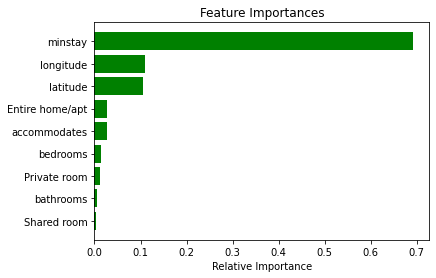

In [22]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')